# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Transcriptomics" data-toc-modified-id="Transcriptomics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Transcriptomics</a></div><div class="lev2 toc-item"><a href="#Log-Transformations-and-DEG-analysis" data-toc-modified-id="Log-Transformations-and-DEG-analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Log Transformations and DEG analysis</a></div><div class="lev2 toc-item"><a href="#Prepping-the-data" data-toc-modified-id="Prepping-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Prepping the data</a></div><div class="lev2 toc-item"><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Explore the data</a></div><div class="lev2 toc-item"><a href="#DEG-analysis" data-toc-modified-id="DEG-analysis-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>DEG analysis</a></div>

# Transcriptomics
## Log Transformations and DEG analysis

By: Justine FRANCOIS
<br>For: BIM6065-C

<br>
Date: July  9th 2023

<hr style="border:1px solid black"> </hr>


In [79]:
print("Name: Justine FRANCOIS")

Name: Justine FRANCOIS


## Prepping the data

To do the DEG analysis, we will be using a R package called Limma Voom. We first need to prep our data so that we have a single file to upload in R.

You were initially handed 6 unstranded RNA-seq samples of MCF7 cells (breast cancer): three of the samples were threated with estradiol (E2). You used STAR to align the reads and do the gene quantification. You now have 6 files with the suffix <code>ReadsPerGene.out.tab</code>.

SRR1012918 -> **treatment**<br>
SRR1012920 -> **treatment**<br>
SRR1012922 -> **treatment**<br>

SRR1012936 -> **control**<br>
SRR1012939 -> **control**<br>
SRR1012942 -> **control**<br>

Publication for the data: https://pubmed.ncbi.nlm.nih.gov/24319002/
<br>STAR documentation: https://physiology.med.cornell.edu/faculty/skrabanek/lab/angsd/lecture_notes/STARmanual.pdf

In [1]:
### Import pandas
import pandas as pd

In [2]:
### Import one DF
## Note I: the data are not comma sepereated (.csv)
## Note II: there are no headers but the columns' names can 
##          be found in STAR's documentation (Section 7)
## Note III: adding columns' names would facilitated the next steps.
# le but ici est de comparer les contrôles et les traitements
# on veut voir si les ttt a un effet. 
#data = pd.read_csv("gene_expression_cancer_1.csv", sep=",", header=0)
#les deux dernieres ne sont pas les plus intéressantes, donc on les enlèvera après
#on renomme les colonnes
#on veut juste un dataframe avec les counts donc on peut enlever
fn_t1= "/u/francoij/Untitled Folder/code_github/datasets/STAR_SRR1012918ReadsPerGene.out (1).tab"
data_t1 = pd.read_csv(fn_t1, sep="\t", header=None, names=["Gene_ids","Treatment","counts_stranded_1","counts_stranded_2"])
data_t1.head()

,Gene_ids,Treatment,counts_stranded_1,counts_stranded_2
0,N_unmapped,4211944,4211944,4211944
1,N_multimapping,0,0,0
2,N_noFeature,812921,9187413,9390931
3,N_ambiguous,1484530,410100,369058
4,ENSG00000223972,1,1,0


In [3]:
### From the imported dataset, we only want a subset of data.
### Let's get rid of the summary rows: identify them.
### We are considering  unstranded RNA-seq data: which count column should
### we keed?
### We want to keep the genes' identification column

### The subset dataset should contain two (2) columns: genes ID and genes count.
#on veut juste u subset de la dataframe avec les gènes et le treatment 
dataSubset_t1= data_t1.iloc[4:,0:2]
dataSubset_t1.head()

,Gene_ids,Treatment
4,ENSG00000223972,1
5,ENSG00000227232,1
6,ENSG00000278267,0
7,ENSG00000243485,0
8,ENSG00000284332,0


In [4]:
### How many genes are you considering?
print(dataSubset_t1.shape[0], " genes")

60675  genes


In [5]:
### For now, we've only considered one (1) sample.
### You were handed six (6)... you now need to import them all and combine
### them :) 

### You can do it how ever you want!
### If you need some guidance, the next cell contains a suggested approach,
### using a for loop and the merge() function from Pandas.

fn_t1= "/u/francoij/Untitled Folder/code_github/datasets/STAR_SRR1012918ReadsPerGene.out (1).tab"
data_t1= pd.read_csv(fn_t1, sep="\t", header=None, names=["Gene_ids","Treatment1","counts_stranded_1","counts_stranded_2"])
data_t1.head()

,Gene_ids,Treatment1,counts_stranded_1,counts_stranded_2
0,N_unmapped,4211944,4211944,4211944
1,N_multimapping,0,0,0
2,N_noFeature,812921,9187413,9390931
3,N_ambiguous,1484530,410100,369058
4,ENSG00000223972,1,1,0


In [6]:
fn_t2= "/u/francoij/Untitled Folder/code_github/datasets/STAR_SRR1012920ReadsPerGene.out.tab"
data_t2= pd.read_csv(fn_t2, sep="\t", header=None, names=["Gene_ids","Treatment2","counts_stranded_1","counts_stranded_2"])
data_t2.head()

,Gene_ids,Treatment2,counts_stranded_1,counts_stranded_2
0,N_unmapped,2957784,2957784,2957784
1,N_multimapping,0,0,0
2,N_noFeature,1003793,7378492,7507701
3,N_ambiguous,991635,274456,246233
4,ENSG00000223972,0,0,0


In [7]:
fn_t3= "/u/francoij/Untitled Folder/code_github/datasets/STAR_SRR1012922ReadsPerGene.out.tab"
data_t3 = pd.read_csv(fn_t3, sep="\t", header=None, names=["Gene_ids","Treatment3","counts_stranded_1","counts_stranded_2"])
data_t3.head()

,Gene_ids,Treatment3,counts_stranded_1,counts_stranded_2
0,N_unmapped,3465954,3465954,3465954
1,N_multimapping,0,0,0
2,N_noFeature,1174065,9040401,9184850
3,N_ambiguous,1297209,357443,327034
4,ENSG00000223972,0,0,0


In [8]:
fn_c1= "/u/francoij/Untitled Folder/code_github/datasets/STAR_SRR1012936ReadsPerGene.out.tab"
data_c1 = pd.read_csv(fn_c1, sep="\t", header=None, names=["Gene_ids","Controle1","counts_stranded_1","counts_stranded_2"])
data_c1.head()

,Gene_ids,Controle1,counts_stranded_1,counts_stranded_2
0,N_unmapped,3654719,3654719,3654719
1,N_multimapping,0,0,0
2,N_noFeature,739576,8698387,8628070
3,N_ambiguous,1268598,346502,319127
4,ENSG00000223972,0,0,0


In [9]:
fn_c2= "/u/francoij/Untitled Folder/code_github/datasets/STAR_SRR1012939ReadsPerGene.out.tab"
data_c2= pd.read_csv(fn_c2, sep="\t", header=None, names=["Gene_ids","Controle2","counts_stranded_1","counts_stranded_2"])
data_c2.head()

,Gene_ids,Controle2,counts_stranded_1,counts_stranded_2
0,N_unmapped,3589816,3589816,3589816
1,N_multimapping,0,0,0
2,N_noFeature,863257,8710179,8640864
3,N_ambiguous,1337458,367426,342252
4,ENSG00000223972,0,0,0


In [10]:
fn_c3= "/u/francoij/Untitled Folder/code_github/datasets/STAR_SRR1012942ReadsPerGene.out.tab"
data_c3= pd.read_csv(fn_c3, sep="\t", header=None, names=["Gene_ids","Controle3","counts_stranded_1","counts_stranded_2"])
data_c3.head()

,Gene_ids,Controle3,counts_stranded_1,counts_stranded_2
0,N_unmapped,4092892,4092892,4092892
1,N_multimapping,0,0,0
2,N_noFeature,730043,9484802,9408369
3,N_ambiguous,1475810,403555,373281
4,ENSG00000223972,0,0,0


In [11]:
dataSubset_t1= data_t1.iloc[4:,0:2]
dataSubset_t1.head()

,Gene_ids,Treatment1
4,ENSG00000223972,1
5,ENSG00000227232,1
6,ENSG00000278267,0
7,ENSG00000243485,0
8,ENSG00000284332,0


In [12]:
dataSubset_t2= data_t2.iloc[4:,0:2]
dataSubset_t2.head()

,Gene_ids,Treatment2
4,ENSG00000223972,0
5,ENSG00000227232,0
6,ENSG00000278267,0
7,ENSG00000243485,0
8,ENSG00000284332,0


In [13]:
dataSubset_t3= data_t3.iloc[4:,0:2]
dataSubset_t3.head()

,Gene_ids,Treatment3
4,ENSG00000223972,0
5,ENSG00000227232,0
6,ENSG00000278267,0
7,ENSG00000243485,0
8,ENSG00000284332,0


In [14]:
dataSubset_c1= data_c1.iloc[4:,0:2]
dataSubset_c1.head()

,Gene_ids,Controle1
4,ENSG00000223972,0
5,ENSG00000227232,1
6,ENSG00000278267,0
7,ENSG00000243485,0
8,ENSG00000284332,0


In [15]:
dataSubset_c2= data_c2.iloc[4:,0:2]
dataSubset_c2.head()

,Gene_ids,Controle2
4,ENSG00000223972,0
5,ENSG00000227232,0
6,ENSG00000278267,0
7,ENSG00000243485,0
8,ENSG00000284332,0


In [16]:
dataSubset_c3= data_c3.iloc[4:,0:2]
dataSubset_c3.head()

,Gene_ids,Controle3
4,ENSG00000223972,0
5,ENSG00000227232,1
6,ENSG00000278267,0
7,ENSG00000243485,0
8,ENSG00000284332,0


In [17]:
import os

### First, create a list with all the genes counts filenames. 
fn = ["STAR_SRR1012918ReadsPerGene.out (1).tab","STAR_SRR1012920ReadsPerGene.out.tab",
      "STAR_SRR1012922ReadsPerGene.out.tab","STAR_SRR1012936ReadsPerGene.out.tab",
      "STAR_SRR1012939ReadsPerGene.out.tab","STAR_SRR1012942ReadsPerGene.out.tab"]


### Second, create a list of sample label. Make sure that the labels are 
### in the same order as the filenames!
sampleLabels = ["Treatment1","Treatment2","Treatment3",
                "Controle1","Controle2","Controle3"]

### Thirs, define a variable for the number of files, and an dataFrame that 
### will contain all of your samples data.
N = 0
geneCount = pd.DataFrame()

### Fourth, create a for loop that will import each gene count file 
### and merge its data to your global dataset.
for i in range(0, len(fn)) :
   
    ### Get sample filename
    fn_tmp = fn[i]
    print(i, fn_tmp)
    
    ### Import sample data (similar to the single sample imported above
    ### Make sure to change the label for each sample
    data_tmp = pd.read_csv(F"/u/francoij/Untitled Folder/code_github/datasets/{fn_tmp}", sep="\t",
                          header=None, names = ["Gene_ids", sampleLabels[i], 
                                                "stranded_1", "Stranded_2"])
    
    data_clean = data_tmp.iloc[4:, 0:2]
    
    #print(data_tmp.head())
    
    ### Select the relevant information (similar to the single sample imported above
    #subset_tmp = 
    
    ### Merge the newly imported sample to the geneCount df
    if geneCount.empty:
        geneCount=data_clean
    else:
        geneCount = pd.merge(geneCount,data_clean, on="Gene_ids")

0 STAR_SRR1012918ReadsPerGene.out (1).tab
1 STAR_SRR1012920ReadsPerGene.out.tab
2 STAR_SRR1012922ReadsPerGene.out.tab
3 STAR_SRR1012936ReadsPerGene.out.tab
4 STAR_SRR1012939ReadsPerGene.out.tab
5 STAR_SRR1012942ReadsPerGene.out.tab


In [18]:
geneCount.head()

,Gene_ids,Treatment1,Treatment2,Treatment3,Controle1,Controle2,Controle3
0,ENSG00000223972,1,0,0,0,0,0
1,ENSG00000227232,1,0,0,1,0,1
2,ENSG00000278267,0,0,0,0,0,0
3,ENSG00000243485,0,0,0,0,0,0
4,ENSG00000284332,0,0,0,0,0,0


In [19]:
geneCount.tail()

,Gene_ids,Treatment1,Treatment2,Treatment3,Controle1,Controle2,Controle3
60670,ENSG00000271254,209,251,285,180,160,229
60671,ENSG00000275405,0,0,0,0,0,0
60672,ENSG00000275987,0,0,0,0,0,0
60673,ENSG00000277475,0,0,0,0,0,0
60674,ENSG00000268674,0,0,0,0,0,0


In [20]:
### You now need to export your geneCount dataFrame to a file so 
### that you can use it to do your DEG.

### You should export it as a tab-seperated file. You can use the to_csv() function.
### You should not export index numbers. You can export the header.
#on veut les header les noms mais pas le uname donc c'est l'index on met non.
geneCount.to_csv("all_gene_count_all_samples.tsv", sep="\t", header=True, index=False)

### Read data from exported file
geneCount_open = pd.read_csv("all_gene_count_all_samples.tsv", sep="\t")
geneCount_open.head()

,Gene_ids,Treatment1,Treatment2,Treatment3,Controle1,Controle2,Controle3
0,ENSG00000223972,1,0,0,0,0,0
1,ENSG00000227232,1,0,0,1,0,1
2,ENSG00000278267,0,0,0,0,0,0
3,ENSG00000243485,0,0,0,0,0,0
4,ENSG00000284332,0,0,0,0,0,0


## Gene counts exploration

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white")

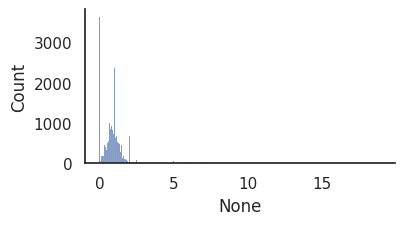

In [22]:
ratio1 = geneCount_open.Controle1 / geneCount_open.Treatment1
sns.histplot(x= ratio1)
sns.despine()

In [23]:
### Calculate the average ratio of Control1 : Treatment1
### Is there a problem?
ratio1.mean()

np.float64(inf)

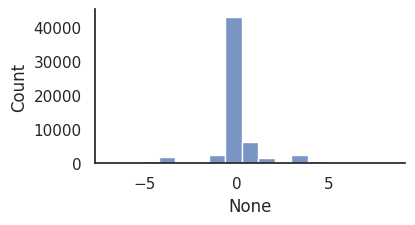

In [24]:
import numpy as np

### Calculate the log2 of the ratio Control1 : Treatment1.
### Plot its distribution and calculate the average.
log_ratio1 = np.log2(geneCount_open["Treatment1"] +0.1) - np.log2(geneCount_open["Controle1"] +0.1)
sns.histplot(x=log_ratio1)
sns.despine()

In [25]:
### What can we tell from the above plot and the calculated average value?


In [26]:
print(True or False)
print (True and False)

True
False


In [27]:
log_ratio1 > 0

0         True
1        False
2        False
3        False
4        False
         ...  
60670     True
60671    False
60672    False
60673    False
60674    False
Length: 60675, dtype: bool

In [28]:
### Which genes are over expressed in the Treatment?
geneCount_open.loc[log_ratio1 > 0,"Gene_ids"]

0        ENSG00000223972
9        ENSG00000238009
33       ENSG00000225972
34       ENSG00000225630
37       ENSG00000229344
              ...       
60613    ENSG00000198727
60614    ENSG00000210195
60615    ENSG00000210196
60641    ENSG00000276256
60670    ENSG00000271254
Name: Gene_ids, Length: 15025, dtype: object

In [29]:
geneCount_open.loc[log_ratio1 > 0,"Gene_ids"].count()

np.int64(15025)

In [30]:
(log_ratio1 > 0).sort_values()

30337    False
37112    False
37113    False
37114    False
37115    False
         ...  
42735     True
42734     True
12902     True
12895     True
0         True
Length: 60675, dtype: bool

In [31]:
### Which genes are the most over expressed in the Treatment?
### Let's select the top10
x = geneCount_open.loc[log_ratio1 > 0,"Gene_ids"]
log_ratio1.sort_values(ascending=False).head(10)

55567    8.370687
52218    8.280771
10110    7.912889
31966    7.721099
27308    7.721099
15566    7.721099
7693     7.577429
7994     7.577429
24035    7.499846
36564    7.499846
dtype: float64

In [32]:
geneCount_open.loc[log_ratio1 > 0,"Gene_ids"]
top10_indext1=log_ratio1.sort_values(ascending=False).head(10).index.values
geneCount_open.loc[top10_indext1, "Gene_ids"]

55567    ENSG00000213253
52218    ENSG00000265091
10110    ENSG00000227337
31966    ENSG00000180176
27308    ENSG00000136574
15566    ENSG00000164362
7693     ENSG00000230993
7994     ENSG00000233045
24035    ENSG00000223657
36564    ENSG00000151224
Name: Gene_ids, dtype: object

In [33]:
### Can we conclude that these genes are the Top10 overexpressed genes in the 
### the Treatment samples?

# Exercices [30 pts]
Once you've completed the next sections, export your Notebook in HTML and submit it to StudiUM. Make sure that your results and answers to the questions are visible and clear.

## Calculate the log2 FC for each pair of Control-Treatment [5 pts]

In [34]:
import numpy as np

In [36]:
### Let's considere all of our samples.
### We want to pair each Treatment - Control samples and calculate their log2 FC 
### with respect to the Treatment.
ratio1 = geneCount_open['Controle1'] / geneCount_open['Treatment1']
print(ratio1)
ratio2 = geneCount_open['Controle2'] / geneCount_open['Treatment2']
print(ratio2)
ratio3 = geneCount_open['Controle3'] / geneCount_open['Treatment3']
print(ratio3)

log_ratio1 = np.log2(geneCount_open['Treatment1'] + 0.1) - np.log2(geneCount_open['Controle1'] + 0.1)
print(log_ratio1)
log_ratio2 = np.log2(geneCount_open['Treatment2'] + 0.1) - np.log2(geneCount_open['Controle2'] + 0.1)
print(log_ratio2)
log_ratio3 = np.log2(geneCount_open['Treatment3'] + 0.1) - np.log2(geneCount_open['Controle3'] + 0.1)
print(log_ratio3)

0        0.000000
1        1.000000
2             NaN
3             NaN
4             NaN
           ...   
60670    0.861244
60671         NaN
60672         NaN
60673         NaN
60674         NaN
Length: 60675, dtype: float64
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
60670    0.63745
60671        NaN
60672        NaN
60673        NaN
60674        NaN
Length: 60675, dtype: float64
0             NaN
1             inf
2             NaN
3             NaN
4             NaN
           ...   
60670    0.803509
60671         NaN
60672         NaN
60673         NaN
60674         NaN
Length: 60675, dtype: float64
0        3.459432
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
60670    0.215395
60671    0.000000
60672    0.000000
60673    0.000000
60674    0.000000
Length: 60675, dtype: float64
0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
         

## Calculate the average log2 FC of each gene [10 pts]

In [37]:
### We now want to calculate the average log2 FC for each gene across 
### the different pairings.

### Let's create a dataframe
gene_ids = geneCount_open.index
log2_fc_pairing = pd.DataFrame({"log_ratio1": log_ratio1, "log_ratio2": log_ratio2, "log_ratio3": log_ratio3})
log2_fc_pairing

,log_ratio1,log_ratio2,log_ratio3
0,3.459432,0.000000,0.000000
1,0.000000,0.000000,-3.459432
2,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
60670,0.215395,0.649289,0.315491
60671,0.000000,0.000000,0.000000
60672,0.000000,0.000000,0.000000
60673,0.000000,0.000000,0.000000


In [38]:
average_log2_ratios = log2_fc_pairing.mean(axis=1)
average_log2_ratios

0        1.153144
1       -1.153144
2        0.000000
3        0.000000
4        0.000000
           ...   
60670    0.393391
60671    0.000000
60672    0.000000
60673    0.000000
60674    0.000000
Length: 60675, dtype: float64

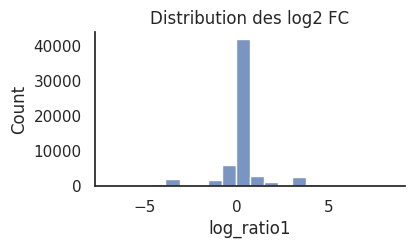

In [47]:
### Plot the log2 FC distribution
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white")
sns.histplot(data=log2_fc_pairing, x='log_ratio1', bins=20, label='log_ratio1')
plt.title('Distribution des log2 FC')
sns.despine()

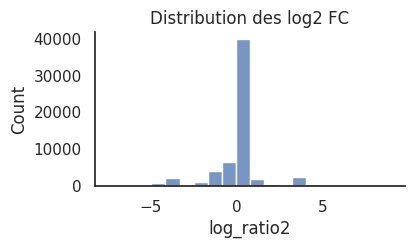

In [44]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white")
sns.histplot(data=log2_fc_pairing, x='log_ratio2', bins=20, label='log_ratio2')
plt.title('Distribution des log2 FC')
sns.despine()

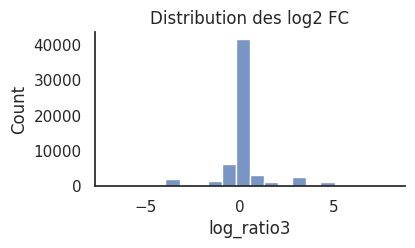

In [45]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white")
sns.histplot(data=log2_fc_pairing, x='log_ratio3', bins=20, label='log_ratio3')
plt.title('Distribution des log2 FC')
sns.despine()

## Identify the Top10 over expressed genes in Treatment [10 pts]

In [48]:
### What are the Top10 over expressed genes in the Treatment?
### Do we get the same Top10?
geneCount_open.loc[log_ratio1 > 0,"Gene_ids"]
top10_index1=log_ratio1.sort_values(ascending=False).head(10).index.values
geneCount_open.loc[top10_index1, "Gene_ids"]

55567    ENSG00000213253
52218    ENSG00000265091
10110    ENSG00000227337
31966    ENSG00000180176
27308    ENSG00000136574
15566    ENSG00000164362
7693     ENSG00000230993
7994     ENSG00000233045
24035    ENSG00000223657
36564    ENSG00000151224
Name: Gene_ids, dtype: object

In [49]:
geneCount_open.loc[log_ratio2 > 0,"Gene_ids"]
top10_index2=log_ratio2.sort_values(ascending=False).head(10).index.values
geneCount_open.loc[top10_index2, "Gene_ids"]

24781    ENSG00000126010
27531    ENSG00000261026
5013     ENSG00000234975
20066    ENSG00000213309
31124    ENSG00000228053
45165    ENSG00000259500
27305    ENSG00000269954
36564    ENSG00000151224
8720     ENSG00000236695
39670    ENSG00000258846
Name: Gene_ids, dtype: object

In [50]:
geneCount_open.loc[log_ratio3 > 0,"Gene_ids"]
top10_index3=log_ratio3.sort_values(ascending=False).head(10).index.values
geneCount_open.loc[top10_index3, "Gene_ids"]

5013     ENSG00000234975
52218    ENSG00000265091
17021    ENSG00000270906
32888    ENSG00000270060
249      ENSG00000231868
39098    ENSG00000244390
25077    ENSG00000216866
56090    ENSG00000240231
32081    ENSG00000271602
42985    ENSG00000213598
Name: Gene_ids, dtype: object

## Analyse the methodology [5 pts]

In [51]:
### Do you find the same Top10?
print("Non, les Top 10 gènes les plus exprimés ne sont pas exactement les mêmes dans les trois traitements")

Non, les Top 10 gènes les plus exprimés ne sont pas exactement les mêmes dans les trois traitements


In [201]:
### Put your critical spectacles on!
### Is that the best approach to do a DEG analysis? 
### What could be done differently? Are we missing something?
print("Non, ce n'est pas la meilleure approche pour une analyse DEG")

Non, ce n'est pas la meilleure approche pour une analyse DEG


In [52]:
print("On pourrait appliquer une correction pour les tests multiples,")
print("normaliser les données, et inclure des réplicats biologiques pour améliorer la précision de l'analyse DEG.")

On pourrait appliquer une correction pour les tests multiples,
normaliser les données, et inclure des réplicats biologiques pour améliorer la précision de l'analyse DEG.
